In [83]:
library('Seurat')

library('tidyr')
library('dplyr')
library('magrittr')
library('ggplot2')
library('readr')

library('gghighlight')

In [2]:
load('../data/all_gex.Rdata')

ls()

[1] "all_gex"

In [3]:
all_gex[['percent.mt']] <- PercentageFeatureSet(all_gex, pattern = "^MT-")

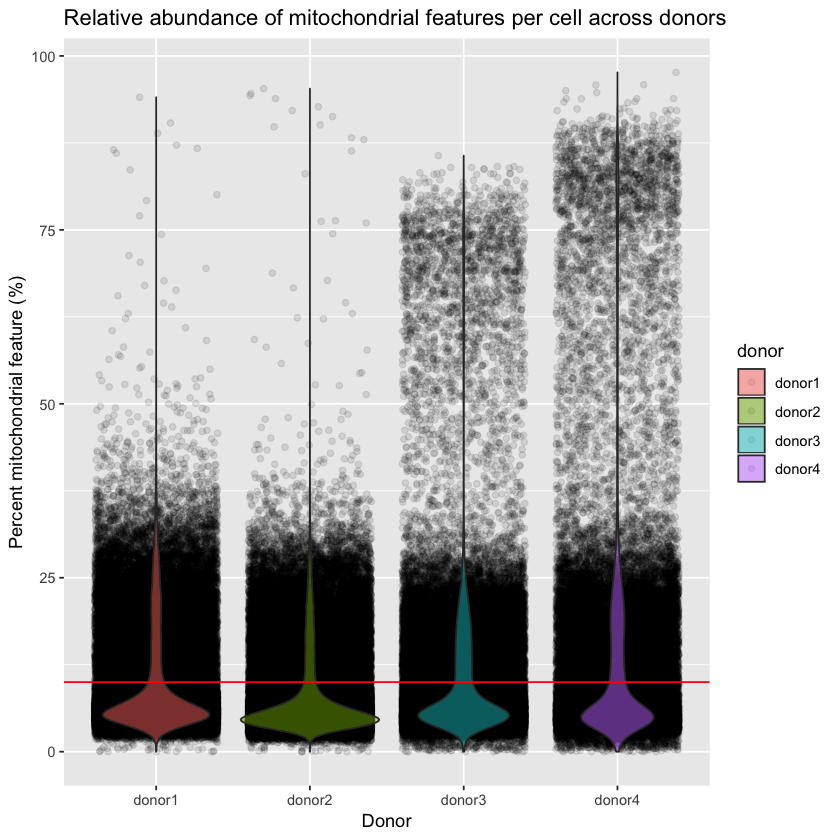

In [4]:
tibble(
    `donor`=all_gex[['orig.ident']] %>% unlist %>% as.factor,
    `percent_mt`=all_gex[['percent.mt']] %>% unlist
) %>%
ggplot(aes(x=`donor`, y=`percent_mt`, fill=`donor`)) +
    geom_jitter(alpha=.1) +
    geom_violin(alpha=.5) +
    geom_hline(yintercept=10, color="red") +
    labs(
        x='Donor',
        y='Percent mitochondrial feature (%)',
        title='Relative abundance of mitochondrial features per cell across donors'
    )
    

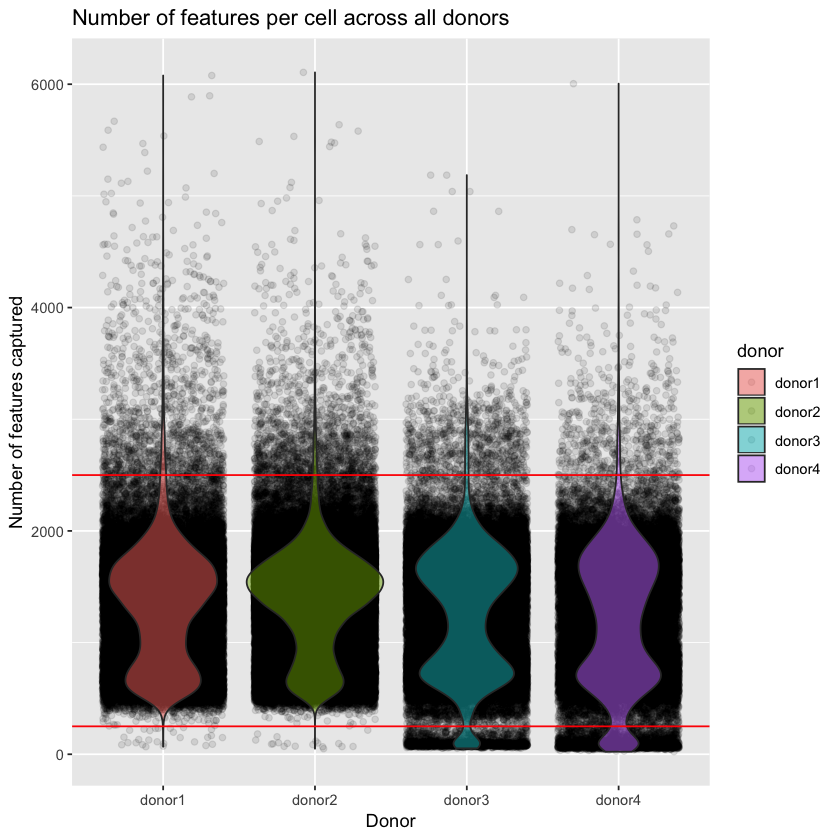

In [5]:
tibble(
    `donor`=all_gex[['orig.ident']] %>% unlist %>% as.factor,
    `percent_mt`=all_gex[['nFeature_RNA']] %>% unlist
) %>%
ggplot(aes(x=`donor`, y=`percent_mt`, fill=`donor`)) +
    geom_jitter(alpha=.1) +
    geom_violin(alpha=.5) +
    geom_hline(yintercept=250, color="red") +
    geom_hline(yintercept=2500, color="red") +
    labs(
        x='Donor',
        y='Number of features captured',
        title='Number of features per cell across all donors'
    )
    

In [6]:
all_gex_filtered <-
    subset(
        all_gex,
        subset=nFeature_RNA > 250 & nFeature_RNA < 2500 & percent.mt < 10
    )

In [7]:
all_gex_filtered <- NormalizeData(all_gex_filtered)

In [8]:
all_gex_filtered <- FindVariableFeatures(all_gex_filtered, selection.method = "vst", nfeatures=1000)
top50 <- head(VariableFeatures(all_gex_filtered), 50)
top50

[1] "TRBV7-2"     "TRBV12-5"    "TRBV10-3"    "TRBV4-1"     "TRBV12-3"   
 [6] "TRBV13"      "TRBV4-2"     "TRBV3-1"     "TRBV11-2"    "TRBV12-4"   
[11] "TRBV5-1"     "IGHA2"       "TRBV28"      "TRBV7-3"     "TRBV7-9"    
[16] "TRBV6-2"     "TRBV14"      "TRBV6-7"     "IGKV2-30"    "TRBV10-2"   
[21] "CCL20"       "TRBV30"      "TRBV6-6"     "TRBV20-1"    "TRBV7-6"    
[26] "TRBV2"       "TRBV5-5"     "TRBV24-1"    "TRBV11-1"    "TRBV9"      
[31] "TRBV6-5"     "TRBV18"      "TRBV10-1"    "TRAV38-2DV8" "TRBV6-1"    
[36] "CCL4L2"      "IGKC"        "TRBV16"      "TRBV29-1"    "TRAV21"     
[41] "IFIT2"       "DNTT"        "TRBV5-4"     "TRBV5-6"     "JCHAIN"     
[46] "TRBV25-1"    "TRDV2"       "TRBV19"      "GNLY"        "MTRNR2L12"

When using repel, set xnudge and ynudge to 0 for optimal results
Warning message:
“Transformation introduced infinite values in continuous x-axis”

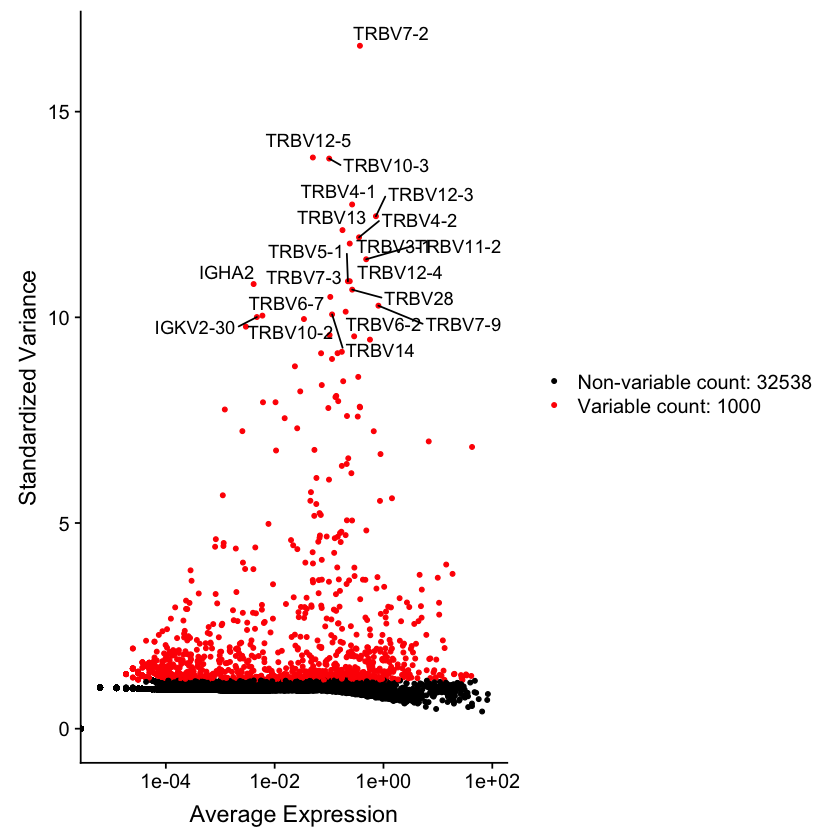

In [9]:
LabelPoints(plot = VariableFeaturePlot(all_gex_filtered), points = head(top50,n=20), repel = TRUE)

In [12]:
all_gex_filtered <- ScaleData(all_gex_filtered)


Centering and scaling data matrix


In [13]:
all_gex_filtered <- RunPCA(all_gex_filtered, features=VariableFeatures(object=all_gex_filtered))


PC_ 1 
Positive:  CCR7, LEF1, ACTN1, AIF1, MAL, NOSIP, LTB, TCF7, RPS13, RPL32 
	   SELL, RPS3A, LDHB, RPS8, EEF1B2, TRABD2A, LRRN3, RPL22, LDLRAP1, RPS6 
	   ARMH1, RPS5, LINC02446, RPL9, TPT1, RPS18, CD248, OXNAD1, NELL2, RPL4 
Negative:  CCL5, NKG7, KLF6, CST7, SRGN, ZFP36, GZMA, DUSP2, NFKBIA, JUN 
	   AHNAK, PPP1R15A, CD69, H3F3B, DUSP1, IER2, TNFAIP3, BHLHE40, GZMH, PMAIP1 
	   ANXA1, TENT5C, HSPA5, FOS, HLA-DRB1, NR4A2, CD74, S100A4, SERTAD1, HLA-DPA1 
PC_ 2 
Positive:  PRF1, GZMH, CX3CR1, PLEK, NKG7, FGFBP2, ADGRG1, GZMA, ACTB, FCRL6 
	   CTSC, S1PR5, KLRD1, FCGR3A, HLA-DQB1, GIMAP7, FGR, GIMAP4, PTGDR, PRSS23 
	   GZMB, CST7, KLRG1, TXNIP, HLA-DPB1, GNLY, ZEB2, CD300A, SPON2, TBX21 
Negative:  FOS, JUNB, TNFAIP3, DUSP1, PPP1R15A, TSC22D3, NFKBIA, ZFP36, JUN, CSRNP1 
	   RGCC, DNAJB1, CXCR4, NR4A2, BTG2, YPEL5, FOSB, KLF2, ZFP36L2, RPLP1 
	   FTH1, CD69, TUBA1A, MYADM, RPL36A, ARL4A, RPS5, LTB, H3F3B, LMNA 
PC_ 3 
Positive:  NEAT1, PDE3B, ITGA4, MAML2, IL7R, SERINC5, FOSB, NFKB

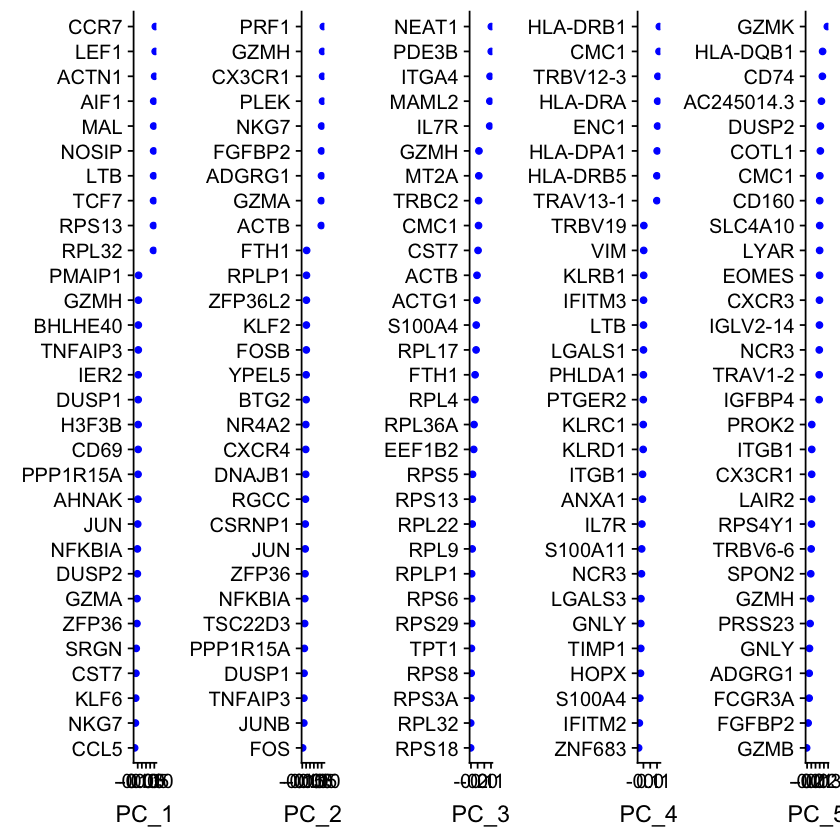

In [15]:
VizDimLoadings(all_gex_filtered, dims=1:5, reduction="pca", ncol=5)


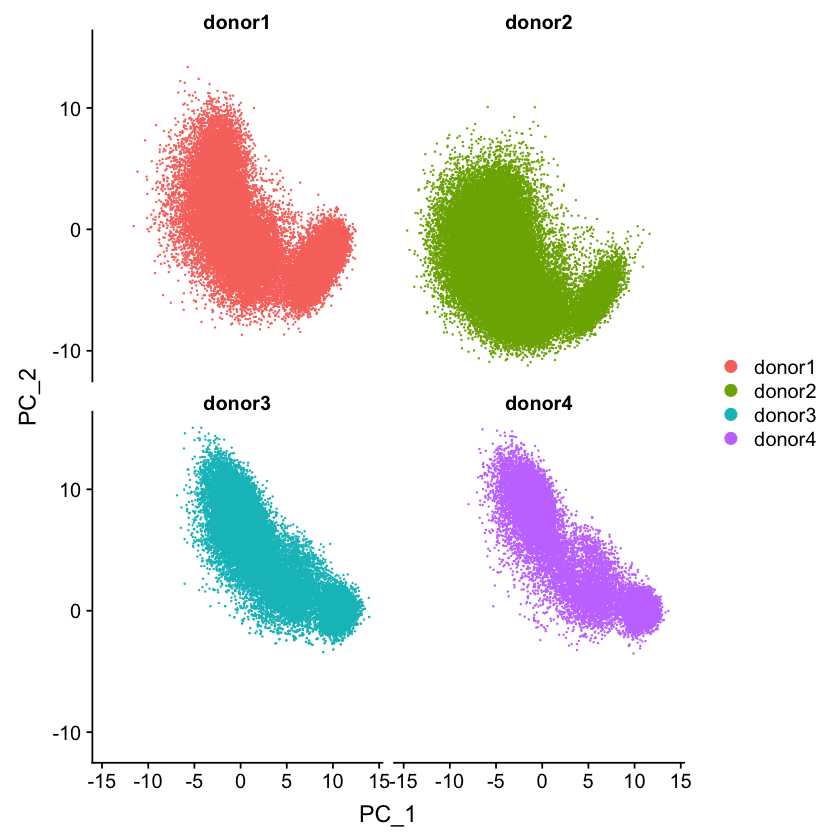

In [18]:
DimPlot(all_gex_filtered, reduction="pca", split.by="orig.ident")

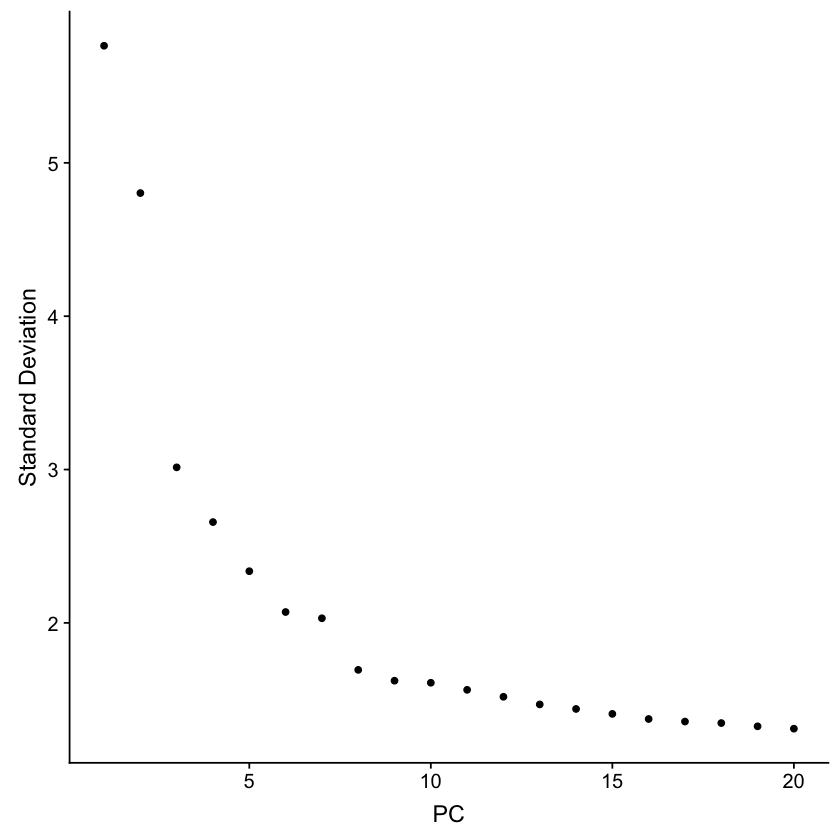

In [19]:
ElbowPlot(all_gex_filtered)


In [20]:
all_gex_filtered <- FindNeighbors(all_gex_filtered, dims=1:7)
all_gex_filtered <- FindClusters(all_gex_filtered, resolution=0.5)

Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 161581
Number of edges: 4337227

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9165
Number of communities: 17
Elapsed time: 474 seconds


In [21]:
all_gex_filtered <- RunUMAP(all_gex_filtered, dims=1:7)


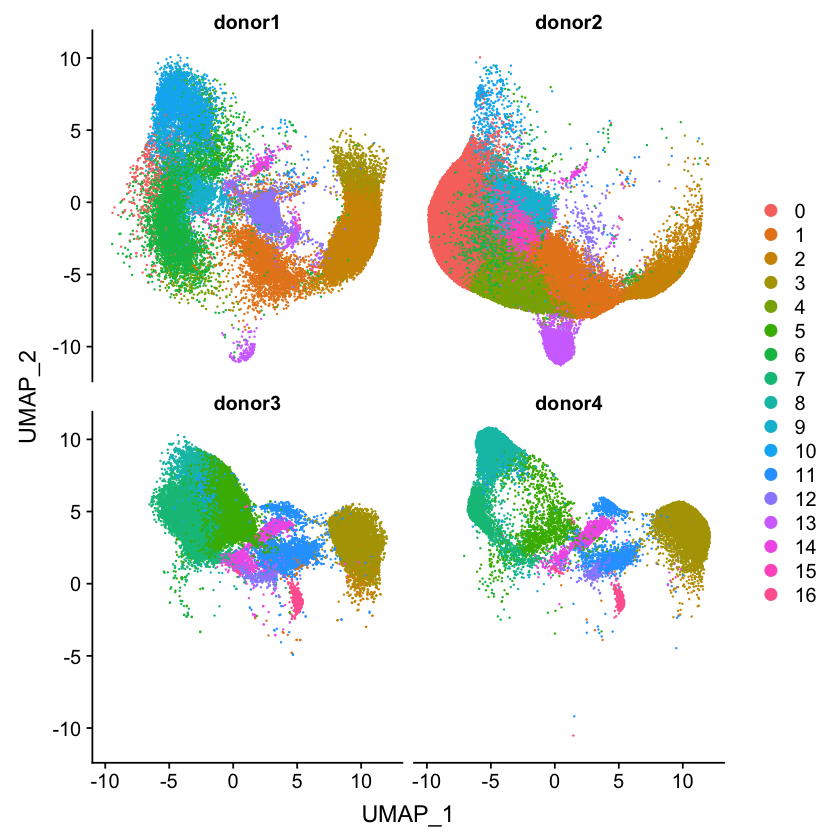

In [22]:
DimPlot(all_gex_filtered, reduction="umap", split.by="orig.ident")

In [23]:
save(
    file="../data/all_gex-processed.Rdata",
    all_gex_filtered
)

In [24]:
all_markers <- FindAllMarkers(all_gex_filtered, only.pos=TRUE, min.pct=0.25, logfc.threshold=0.25)
all_markers %>% group_by(cluster) %>% top_n(n=5, wt=avg_logFC)

Calculating cluster 0
Calculating cluster 1
Calculating cluster 2
Calculating cluster 3
Calculating cluster 4
Calculating cluster 5
Calculating cluster 6
Calculating cluster 7
Calculating cluster 8
Calculating cluster 9
Calculating cluster 10
Calculating cluster 11
Calculating cluster 12
Calculating cluster 13
Calculating cluster 14
Calculating cluster 15
Calculating cluster 16


p_val,avg_logFC,pct.1,pct.2,p_val_adj,cluster,gene
0,1.0417001,0.956,0.388,0,0,GZMH
0,0.9738523,0.770,0.261,0,0,SERTAD1
0,0.9725108,0.796,0.328,0,0,CMC1
0,0.9197877,1.000,0.736,0,0,NKG7
0,0.8371620,0.786,0.273,0,0,FGFBP2
0,1.2905822,0.413,0.062,0,1,TRBV19
0,0.8620369,0.805,0.421,0,1,RGCC
0,0.8352444,0.998,0.752,0,1,FOS
0,0.7418931,0.429,0.047,0,1,LGALS3
0,0.7185370,0.993,0.831,0,1,ZFP36


In [26]:
write_csv(all_markers, '../data/all_markers-16clusters.csv')

In [92]:
all_markers %>% group_by(cluster) %>% top_n(n=3, wt=avg_logFC)

p_val,avg_logFC,pct.1,pct.2,p_val_adj,cluster,gene
0,1.0417001,0.956,0.388,0,0,GZMH
0,0.9738523,0.770,0.261,0,0,SERTAD1
0,0.9725108,0.796,0.328,0,0,CMC1
0,1.2905822,0.413,0.062,0,1,TRBV19
0,0.8620369,0.805,0.421,0,1,RGCC
0,0.8352444,0.998,0.752,0,1,FOS
0,0.8664884,0.893,0.304,0,2,LEF1
0,0.8169856,0.900,0.409,0,2,TCF7
0,0.8051756,0.610,0.110,0,2,AIF1
0,1.1214102,0.859,0.183,0,3,CCR7


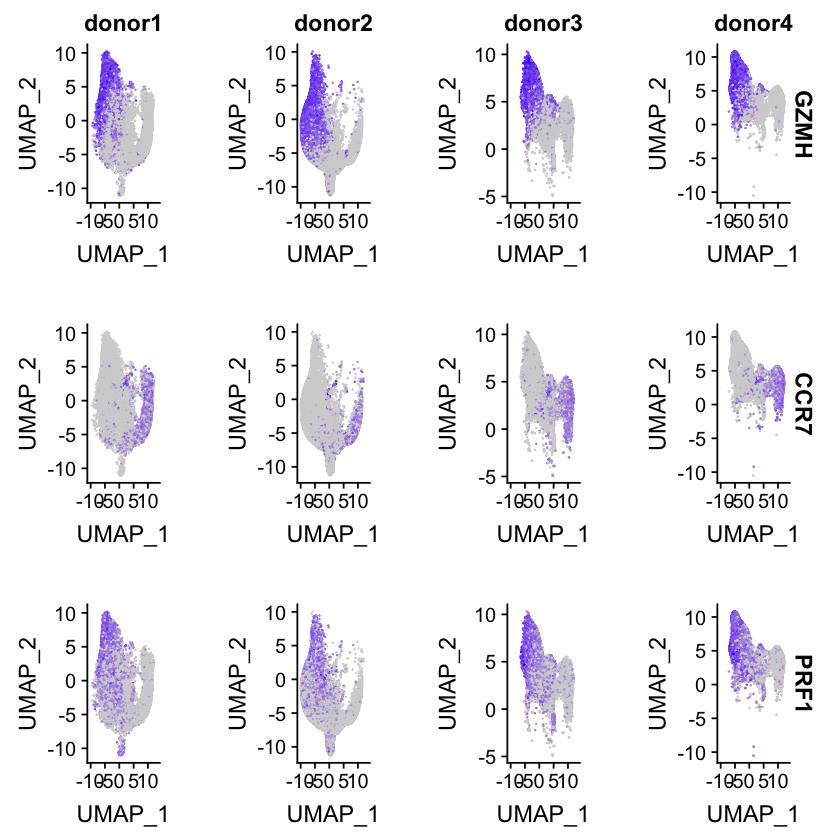

In [42]:
FeaturePlot(
    all_gex_filtered,
    features=c("GZMH", "CCR7", "PRF1"),
    split.by="orig.ident"
)

FeaturePlot(
    all_gex_filtered,
    features=c("nFeature_RNA", "CCR7"),
    split.by="orig.ident"
)

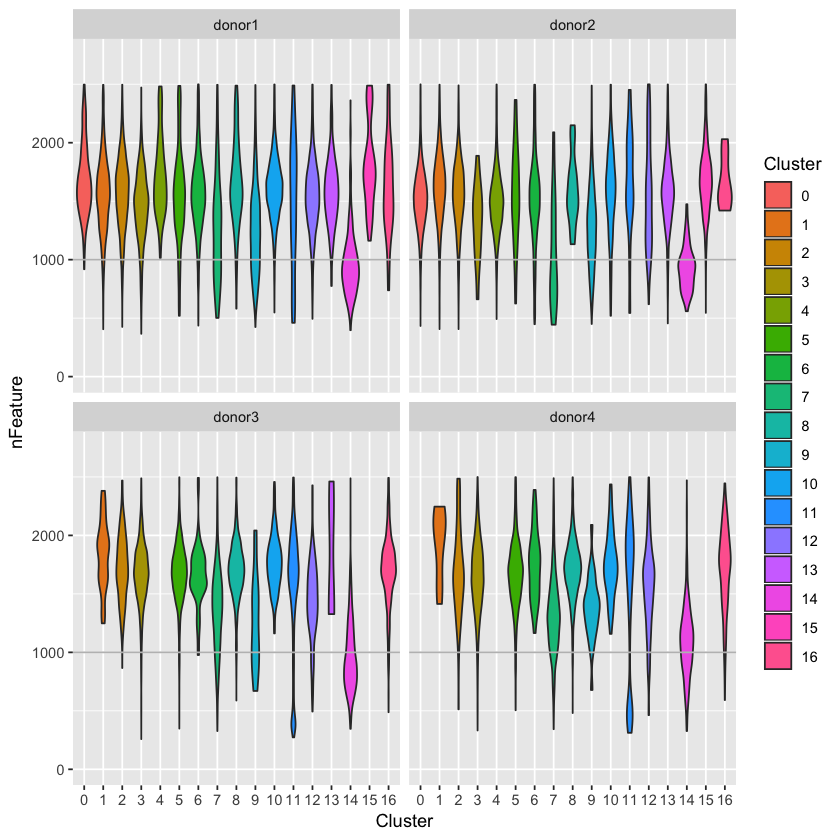

In [90]:
tibble(
    `Cluster`=as.factor(all_gex_filtered$seurat_clusters %>% unlist),
    `Donor`=as.factor(all_gex_filtered$orig.ident %>% unlist),
    `nFeature`=all_gex_filtered$nFeature_RNA %>% unlist
) %>%
ggplot(aes(y=`nFeature`, x=`Cluster`, fill=`Cluster`)) +
    geom_violin() +
    facet_wrap(~`Donor`) +
    geom_hline(yintercept=1000, color="gray") +
    ylim(0, 2750)
